# Introduction
<p>Welcome! In this notebook i'm going to analyze credit card's customers data and implement a Machine Learning Classfier to predict the attrition probabilty of customers</p>
<h3>My main objectives on this project are:</h3>   
<ul>
    <li>Applying exploratory data analysis and trying to get some insights about our dataset</li>
    <li>Getting data in better shape by transforming and feature engineering to help us in building better models</li>
    <li>Building and tuning different ML algorithms to get some results on predicting Attrition</li>
</ul>

<h2>Importing Libraries</h2>
<p>Lets start by importing some packages we are going to need</p>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Meeting the data
<p>Lets open the data and see what we have</p>

In [2]:
#Opening the data
data = pd.read_csv('./customersData.csv')

In [3]:
#Lets see the shapes of the data so we know what we are dealing with
data.shape

(10127, 23)

In [4]:
#lets observe some of his elements
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [5]:
#Lets delete the last two columns as they are irrelevant
data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                  "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
         inplace=True)


In [6]:
# Dividing the label and features columns in X, y and then eliminating ids as they are irrelevants for the analysis and modeling
X = data.copy()
X.drop(columns=['CLIENTNUM', 'Attrition_Flag'], inplace=True)
y = data['Attrition_Flag']

In [7]:
# Using a label binarizer to convert y label into 1's and 0's
labelBinarizer = LabelBinarizer()
y = labelBinarizer.fit_transform(y)
y = np.reshape(y, -1)
y = pd.Series(y)

# EDA
<p>Exploratory Data Analysis</p>

<p>Lets create a heatmap graphic here. With this graphic we can see the correlation between different features</p>

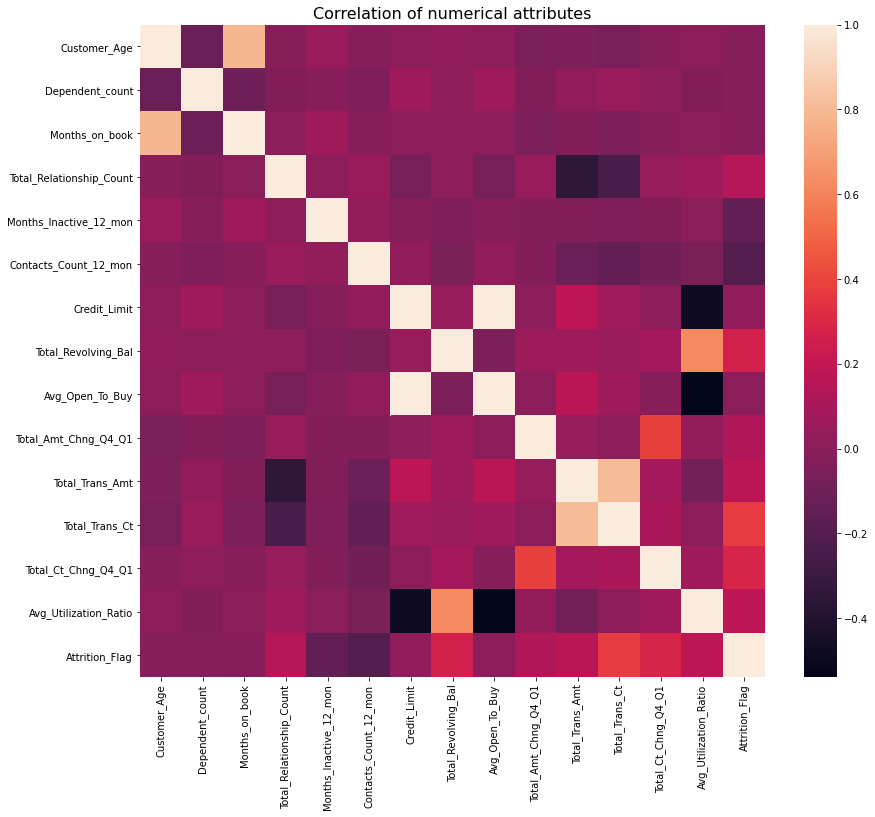

In [8]:
#For this purpose, i'll concatenate y and X
analysisData = X.copy()
analysisData['Attrition_Flag'] = y
correlation = analysisData.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

<h4>Observations</h4>
<li>Let's focus on the lighter parts of the graph</li>
<ol>
    <li>Customer age and Months on book have a high correlation because these customers just got the possibility of getting a credit card</li>
    <li>Avg_Open_To_Buy and Credit_Limit have a high correlation because they are telling the "same thing"</li>
    <li>Total Transaction Amount is high correlated with Total Transacion Count because usually the amount tends to get higher as the count of transactions grow</li>
</ol>

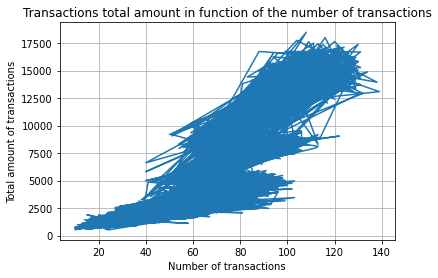

In [9]:
# To be clearer, let's take a look at a simple plot Total_Trans_Amt in function of Total_Trans_Ct

amount = analysisData['Total_Trans_Amt']
count = analysisData['Total_Trans_Ct']

fig, ax = plt.subplots()
ax.plot(count, amount)

ax.set(xlabel='Number of transactions', ylabel='Total amount of transactions',
       title='Transactions total amount in function of the number of transactions')
ax.grid()

plt.show()

In [10]:
#Lets see the variability and some other statistics of categorical columns
cat_columns = X.select_dtypes(include=['object']).columns
for col in cat_columns:
    print(X[col].value_counts(ascending=True, normalize=True))
    print(X[col].describe())
    print("---------------------------------------------------")

M    0.470919
F    0.529081
Name: Gender, dtype: float64
count     10127
unique        2
top           F
freq       5358
Name: Gender, dtype: object
---------------------------------------------------
Doctorate        0.044534
Post-Graduate    0.050953
College          0.100030
Uneducated       0.146835
Unknown          0.149995
High School      0.198776
Graduate         0.308877
Name: Education_Level, dtype: float64
count        10127
unique           7
top       Graduate
freq          3128
Name: Education_Level, dtype: object
---------------------------------------------------
Divorced    0.073862
Unknown     0.073961
Single      0.389355
Married     0.462822
Name: Marital_Status, dtype: float64
count       10127
unique          4
top       Married
freq         4687
Name: Marital_Status, dtype: object
---------------------------------------------------
$120K +           0.071788
Unknown           0.109805
$60K - $80K       0.138442
$80K - $120K      0.151575
$40K - $60K       0.17675

# Missing Data
<ul>
    <li>Lets see if there any missing values and visualize them</li>
</ul>

In [11]:
X.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<li>Luckily we don't have any missing values, so we can proceed with modeling</li>

# Preprocessing + Pipeline
<li>First, lets split the data into train and test dataframes</li>
<p>Pipeline Steps:</p>
<ol>
    <li>One Hot Encoding</li>
    <li>Quantile Proccesing</li>
    <li>Fit the model</li>
</ol>

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [13]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.07, max_depth=7, min_child_weight=4,
                  n_estimators = 500, nthread=4, objective= 'reg:linear', subsample= 0.7, tree_method='gpu_hist')

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer

In [15]:
catTransformer = ColumnTransformer([('encoder', OneHotEncoder(), cat_columns)], remainder='passthrough')

In [16]:
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline(steps=[
                                ('One Hot Encoding', catTransformer),
                                ('Quantile_Proccesing', QuantileTransformer(n_quantiles=10, random_state=0)),
                                ('XGBoost', xgb)
                                ])
model_pipeline.fit(X_train, y_train)

[10:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('One Hot Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object'))])),
                ('Quantile_Proccesing',
                 QuantileTransformer(n_quantiles=10, random_state=0)),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbt...
                               max_delta_step=0, max_depth=7,
                               min_child_weight=4, missing=nan,
                               monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
                               n_estimators=500, n_jobs=4, nthread=4,
                               num_parallel_tree=1, objective='reg:linear',
                               random_state=0

In [18]:
# Accuracy Metrics
from sklearn.metrics import accuracy_score

y_pred = model_pipeline.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.10%


# End
<p>Thanks for going all the way down through my notebook! I hope you were able to get something usefull from this. Feel free to ask your questions and use my code</p>